Data Loading

In [ ]:
import pandas as pd
df_train=pd.read_csv('/content/train.csv')
df_train.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [ ]:
df_train.shape

(37137, 10)

In [ ]:
df_train = df_train.drop('id', axis=1)

In [ ]:
df_train.shape

(37137, 9)

Duplicate Check

In [ ]:
# Check for duplicate rows
duplicates = df_train.duplicated()

print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


Missing Values Check

In [ ]:
df_train.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Correlation using heatmap

<Axes: title={'center': 'correlation'}>

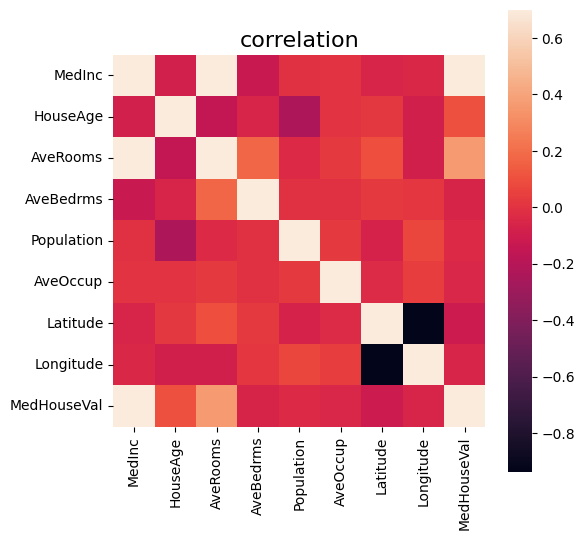

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Finding Co-relation


num_feat=df_train.select_dtypes(include=[np.number])
corr=num_feat.corr()
f,ax=plt.subplots(figsize=(6,6))
plt.title("correlation",y=1,size=16)
sns.heatmap(corr,square=True,vmax=0.7)

We have to keep in mind that MedHouseVal is our target col . So from this heatmap we are getting to know that 'MedInc','HouseAge', 'AveRooms' columns are more correlated with our target col .

Checking for Some Observable Outliers

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

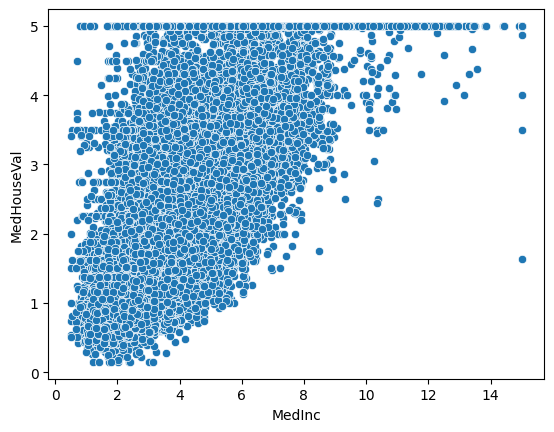

In [ ]:
#loooking for some relations

sns.scatterplot(x='MedInc',y='MedHouseVal',data=df_train)

<Axes: xlabel='AveRooms', ylabel='MedHouseVal'>

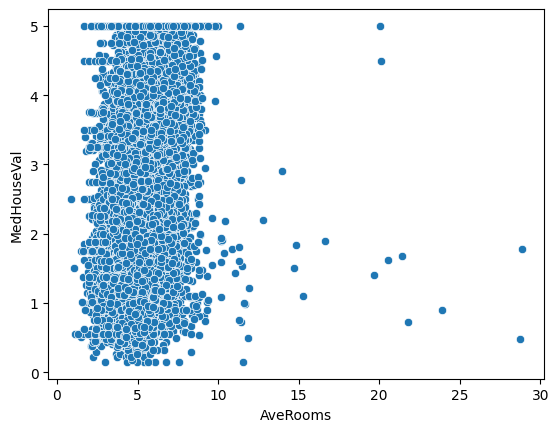

In [ ]:
# Some Outliers are present

sns.scatterplot(x='AveRooms',y='MedHouseVal',data=df_train)

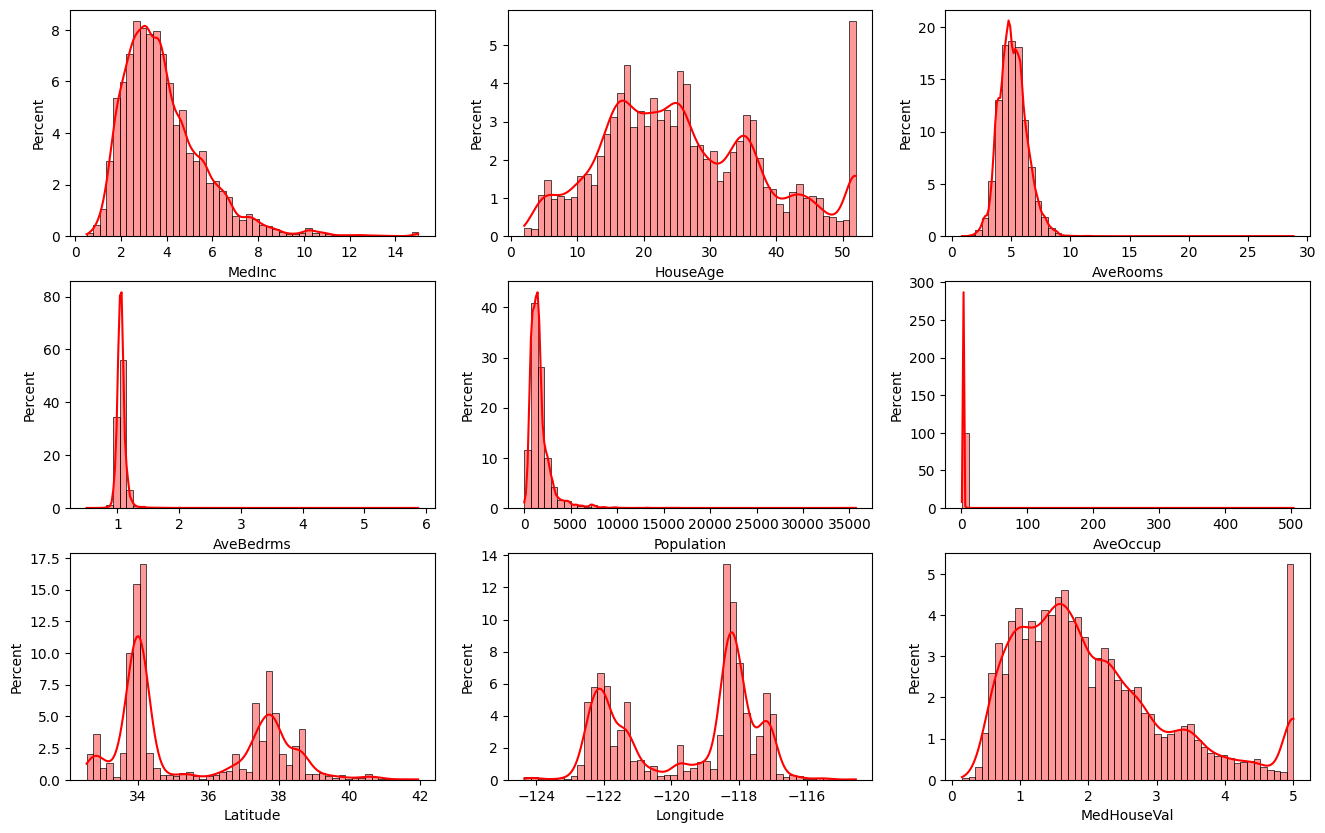

In [ ]:
# Looking for Distribution of cols

n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins
}
# features= df_train.columns
cols=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude',"MedHouseVal"]
fig, ax = plt.subplots(3,3, figsize=(16, 10))
ax = ax.flatten()

for i, column in enumerate(cols):
    sns.histplot(
        df_train[column], label='Train',
        ax=ax[i], color='red', **histplot_hyperparams
    )

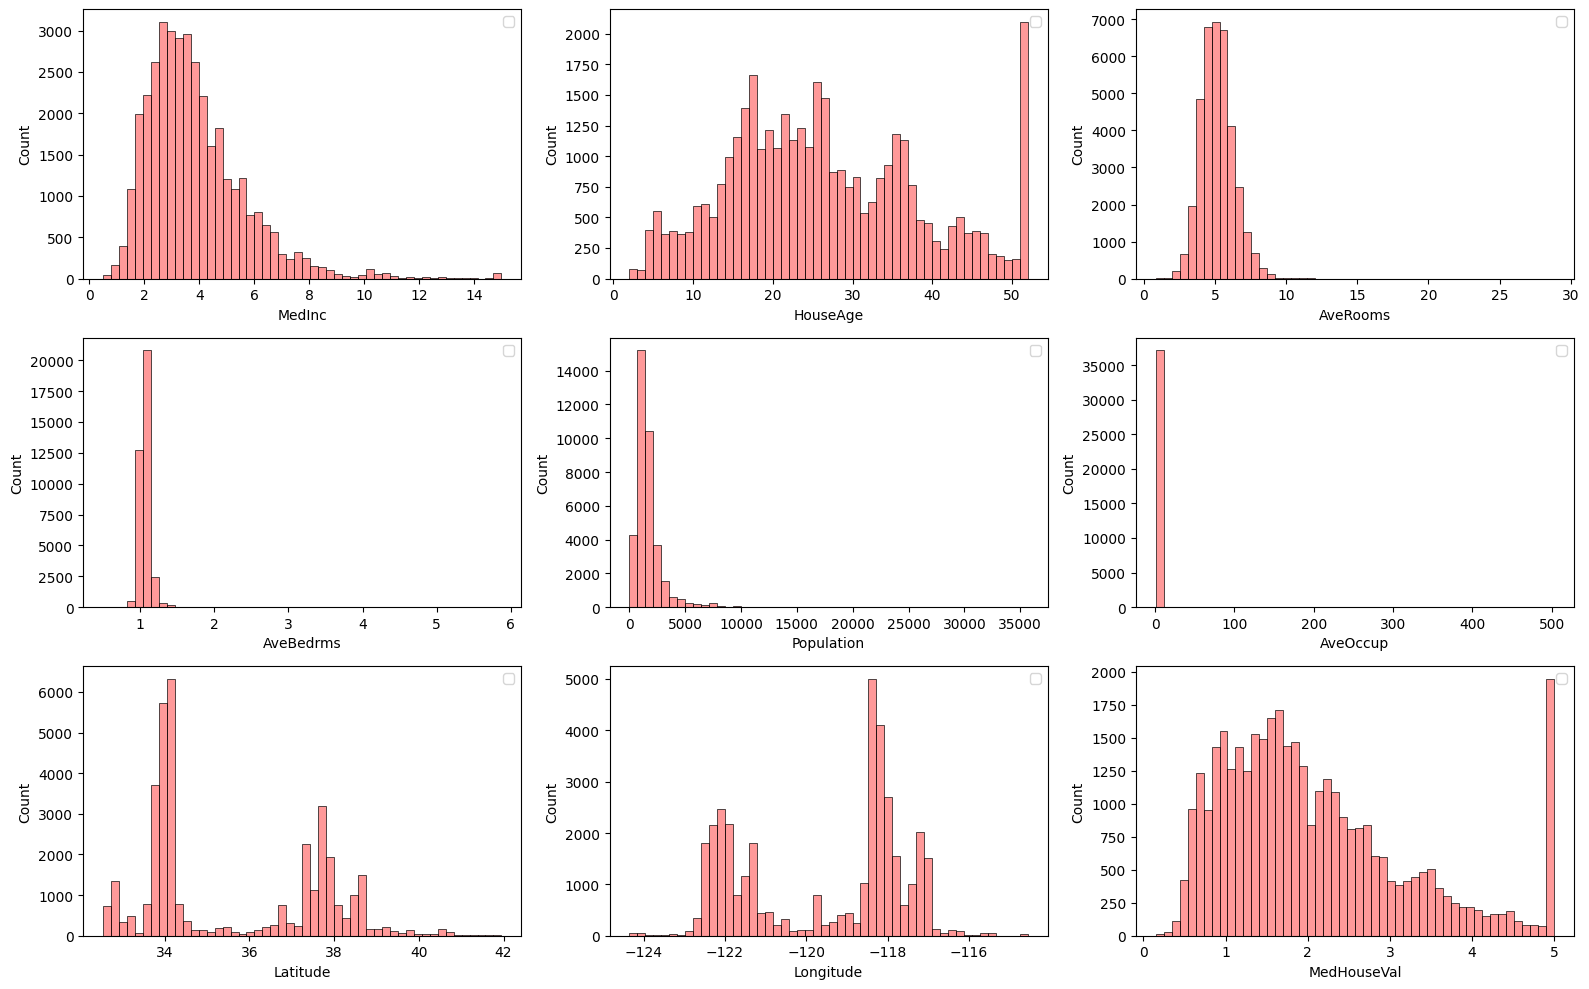

In [ ]:
# Histogram parameters
histplot_hyperparams = {
    'kde': False,  # Disable KDE for simple histograms
    'alpha': 0.4,
    'stat': 'count',  # Use 'count' to display the number of observations
    'bins': n_bins
}

# Columns to plot
cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']

# Create subplots
fig, ax = plt.subplots(3, 3, figsize=(16, 10))
ax = ax.flatten()

# Plot histograms
import seaborn as sns

for i, column in enumerate(cols):
    sns.histplot(
        data=df_train,
        x=column,
        ax=ax[i], color='red', **histplot_hyperparams
    )
    ax[i].legend()
plt.tight_layout()
plt.show()


<ipython-input-47-d20838d84c63>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train MSE'], y=[train_mse], palette='Blues')
<ipython-input-47-d20838d84c63>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Test MSE'], y=[test_mse], palette='Blues')
<ipython-input-47-d20838d84c63>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train MAE'], y=[train_mae], palette='Greens')
<ipython-input-47-d20838d84c63>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x`

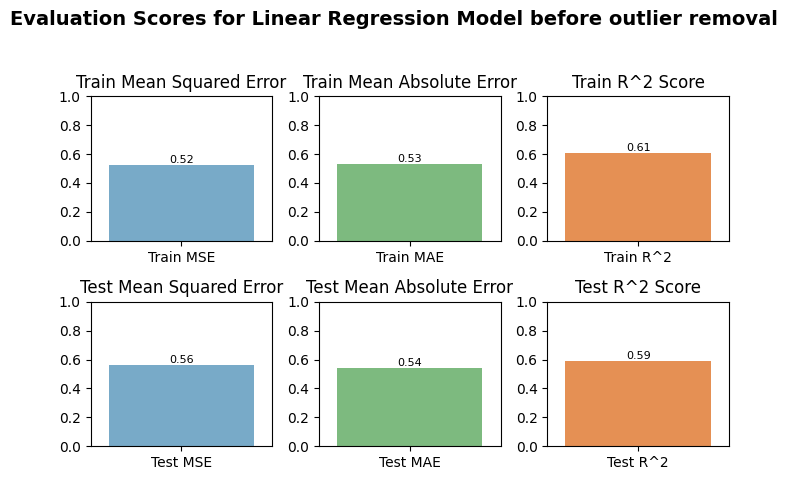

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'df' is your DataFrame
# Split the dataset into features and target variable
X = df_train.iloc[:, :-1]  # Features (all columns except the last)
y = df_train.iloc[:, -1]   # Target (the last column)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Evaluate the model on training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the model on testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Visualize evaluation scores
plt.figure(figsize=(7, 5))

# Plotting Mean Squared Error (MSE)
plt.subplot(2, 3, 1)
sns.barplot(x=['Train MSE'], y=[train_mse], palette='Blues')
plt.title('Train Mean Squared Error')
plt.ylim(0, max(train_mse * 1.2, 1))  # Set y-axis limit
# Annotate bars with values
for index, value in enumerate([train_mse]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.subplot(2, 3, 4)
sns.barplot(x=['Test MSE'], y=[test_mse], palette='Blues')
plt.title('Test Mean Squared Error')
plt.ylim(0, max(test_mse * 1.2, 1))  # Set y-axis limit
# Annotate bars with values
for index, value in enumerate([test_mse]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

# Plotting Mean Absolute Error (MAE)
plt.subplot(2, 3, 2)
sns.barplot(x=['Train MAE'], y=[train_mae], palette='Greens')
plt.title('Train Mean Absolute Error')
plt.ylim(0, max(train_mae * 1.2, 1))  # Set y-axis limit
# Annotate bars with values
for index, value in enumerate([train_mae]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.subplot(2, 3, 5)
sns.barplot(x=['Test MAE'], y=[test_mae], palette='Greens')
plt.title('Test Mean Absolute Error')
plt.ylim(0, max(test_mae * 1.2, 1))  # Set y-axis limit
# Annotate bars with values
for index, value in enumerate([test_mae]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

# Plotting R^2 Score
plt.subplot(2, 3, 3)
sns.barplot(x=['Train R^2'], y=[train_r2], palette='Oranges')
plt.title('Train R^2 Score')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1]
# Annotate bars with values
for index, value in enumerate([train_r2]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.subplot(2, 3, 6)
sns.barplot(x=['Test R^2'], y=[test_r2], palette='Oranges')
plt.title('Test R^2 Score')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1]
# Annotate bars with values
for index, value in enumerate([test_r2]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.suptitle('Evaluation Scores for Linear Regression Model before outlier removal', fontsize=14, fontweight='bold')  # Add overall title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlapping and leave space for suptitle
plt.show()


Linear Regression Model before outlier removal

Univariate Outlier Detection: IQR

Number of outliers for each variable:
MedInc: 1161
HouseAge: 0
AveRooms: 565
AveBedrms: 1609
Population: 2502
AveOccup: 1400
Latitude: 0
Longitude: 0
MedHouseVal: 1998
Total number of outlier rows in the dataset: 7506
Percentage of outlier rows in the dataset: 20.21%


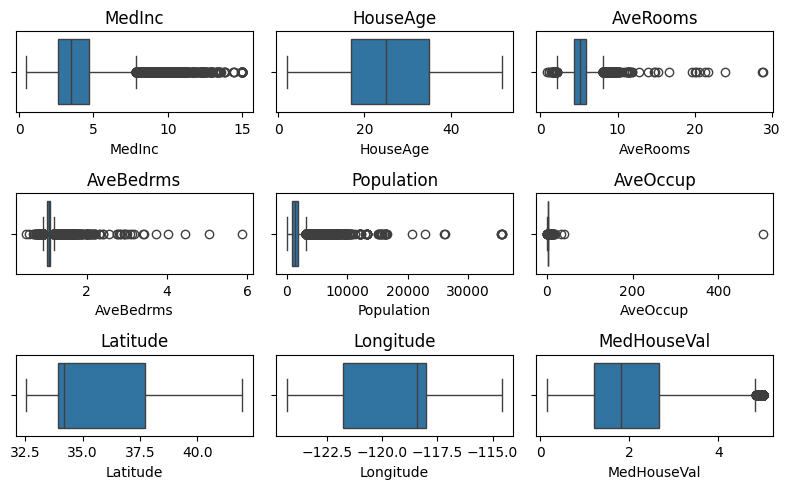

In [ ]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(df_train):
    outliers = {}
    outlier_indices = set()
    for col in df_train.columns:
        if df_train[col].dtype in ['int64', 'float64']:
            q1 = df_train[col].quantile(0.25)
            q3 = df_train[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outlier_count = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)][col].count()
            outliers[col] = outlier_count
            outlier_indices.update(df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)].index)


    total_outlier_rows = len(outlier_indices)
    percentage_outlier_rows = total_outlier_rows / len(df_train) * 100

    return outliers, total_outlier_rows, percentage_outlier_rows,outlier_indices

# Detect outliers and count for each variable
outliers_count, total_outlier_rows, percentage_outlier_rows, outlier_indices = detect_outliers_iqr(df_train)
print("Number of outliers for each variable:")
for col, count in outliers_count.items():
    print(f"{col}: {count}")
print(f"Total number of outlier rows in the dataset: {total_outlier_rows}")
print(f"Percentage of outlier rows in the dataset: {percentage_outlier_rows:.2f}%")


# Visualize outliers using box plots
plt.figure(figsize=(8, 5))
for i, col in enumerate(df_train.columns):
    if df_train[col].dtype in ['int64', 'float64']:
        plt.subplot(3, 3, i+1)
        sns.boxplot(x=df_train[col])
        plt.title(col)
plt.tight_layout()
plt.show()

Checking performance after removal of outliers detected through IQR

In [ ]:
# Create a new DataFrame without outliers
df_IQR = df_train.drop(index=outlier_indices)
df_IQR.shape

(29631, 9)

<ipython-input-48-f86bfe71e86e>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train MSE'], y=[train_mse], palette='Blues')
<ipython-input-48-f86bfe71e86e>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Test MSE'], y=[test_mse], palette='Blues')
<ipython-input-48-f86bfe71e86e>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train MAE'], y=[train_mae], palette='Greens')
<ipython-input-48-f86bfe71e86e>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x`

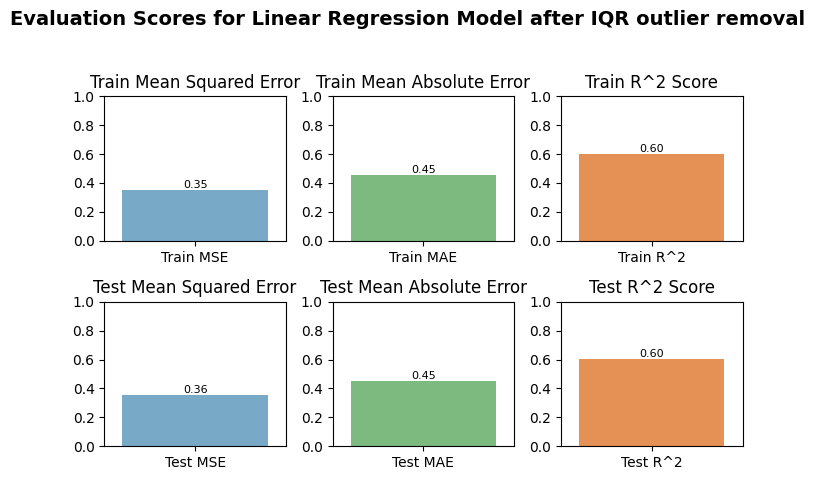

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'df' is your DataFrame
# Split the dataset into features and target variable
X = df_IQR.iloc[:, :-1]  # Features (all columns except the last)
y = df_IQR.iloc[:, -1]   # Target (the last column)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Evaluate the model on training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the model on testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Visualize evaluation scores
plt.figure(figsize=(7, 5))

# Plotting Mean Squared Error (MSE)
plt.subplot(2, 3, 1)
sns.barplot(x=['Train MSE'], y=[train_mse], palette='Blues')
plt.title('Train Mean Squared Error')
plt.ylim(0, max(train_mse * 1.2, 1))  # Set y-axis limit
# Annotate bars with values
for index, value in enumerate([train_mse]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.subplot(2, 3, 4)
sns.barplot(x=['Test MSE'], y=[test_mse], palette='Blues')
plt.title('Test Mean Squared Error')
plt.ylim(0, max(test_mse * 1.2, 1))  # Set y-axis limit
# Annotate bars with values
for index, value in enumerate([test_mse]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

# Plotting Mean Absolute Error (MAE)
plt.subplot(2, 3, 2)
sns.barplot(x=['Train MAE'], y=[train_mae], palette='Greens')
plt.title('Train Mean Absolute Error')
plt.ylim(0, max(train_mae * 1.2, 1))  # Set y-axis limit
# Annotate bars with values
for index, value in enumerate([train_mae]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.subplot(2, 3, 5)
sns.barplot(x=['Test MAE'], y=[test_mae], palette='Greens')
plt.title('Test Mean Absolute Error')
plt.ylim(0, max(test_mae * 1.2, 1))  # Set y-axis limit
# Annotate bars with values
for index, value in enumerate([test_mae]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

# Plotting R^2 Score
plt.subplot(2, 3, 3)
sns.barplot(x=['Train R^2'], y=[train_r2], palette='Oranges')
plt.title('Train R^2 Score')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1]
# Annotate bars with values
for index, value in enumerate([train_r2]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.subplot(2, 3, 6)
sns.barplot(x=['Test R^2'], y=[test_r2], palette='Oranges')
plt.title('Test R^2 Score')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1]
# Annotate bars with values
for index, value in enumerate([test_r2]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.suptitle('Evaluation Scores for Linear Regression Model after IQR outlier removal', fontsize=14, fontweight='bold')  # Add overall title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlapping and leave space for suptitle
plt.show()


Univariate Outllier Detection: Z score Method

Number of outliers for each variable:
MedInc: 545
HouseAge: 0
AveRooms: 178
AveBedrms: 315
Population: 726
AveOccup: 17
Latitude: 10
Longitude: 0
MedHouseVal: 0
Total number of outlier rows in the dataset: 1640
Percentage of outlier rows in the dataset: 4.42%
Percentage of outliers for each variable:
{'MedInc': 1.4675391119368824, 'HouseAge': 0.0, 'AveRooms': 0.47930635215553224, 'AveBedrms': 0.8482106793763633, 'Population': 1.954923661038856, 'AveOccup': 0.04577644936316881, 'Latitude': 0.026927323154805182, 'Longitude': 0.0, 'MedHouseVal': 0.0}


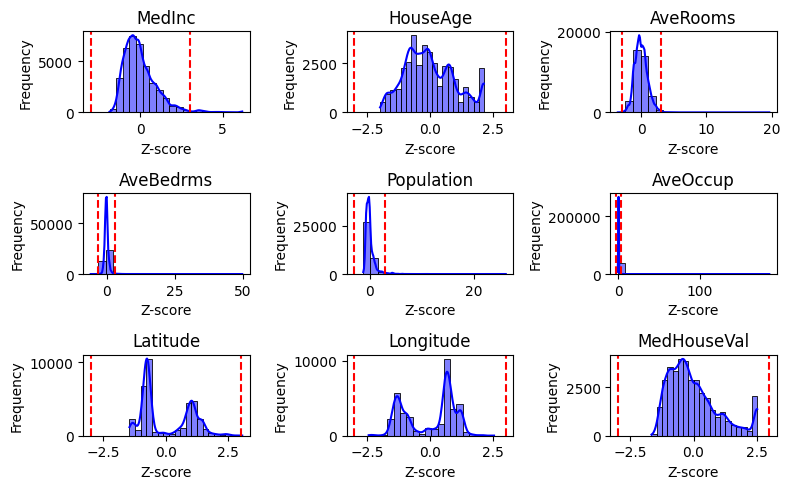

In [ ]:
# Function to detect outliers using Z-score method
def detect_outliers_zscore(df_train):
    outliers = {}
    outlier_indices = set()
    z_scores_df = pd.DataFrame()

    for col in df_train.columns:
        if df_train[col].dtype in ['int64', 'float64']:
            z_scores = (df_train[col] - df_train[col].mean()) / df_train[col].std()
            z_scores_df[col] = z_scores
            outlier_condition = (z_scores > 3) | (z_scores < -3)
            outlier_count = outlier_condition.sum()
            outliers[col] = outlier_count
            outlier_indices.update(df_train[outlier_condition].index)

    total_outlier_rows = len(outlier_indices)
    percentage_outlier_rows = total_outlier_rows / len(df_train) * 100

    return outliers, total_outlier_rows, percentage_outlier_rows, outlier_indices, z_scores_df

# Detect outliers using Z-score method and count for each variable
outliers_count, total_outlier_rows, percentage_outlier_rows, outlier_indices, z_scores_df = detect_outliers_zscore(df_train)
print("Number of outliers for each variable:")
for col, count in outliers_count.items():
    print(f"{col}: {count}")
print(f"Total number of outlier rows in the dataset: {total_outlier_rows}")
print(f"Percentage of outlier rows in the dataset: {percentage_outlier_rows:.2f}%")

# Calculate percentage of outliers for each variable
outliers_percentage = {col: count / len(df_train) * 100 for col, count in outliers_count.items()}
print("Percentage of outliers for each variable:")
print(outliers_percentage)

# Visualize outliers using histograms of Z-scores
plt.figure(figsize=(8,5))
for i, col in enumerate(z_scores_df.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(z_scores_df[col], kde=True, color='blue', bins=20)
    plt.axvline(x=3, color='red', linestyle='--')
    plt.axvline(x=-3, color='red', linestyle='--')
    plt.title(col)
    plt.xlabel('Z-score')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Checking performance after removal of outliers detected through Z score

In [ ]:
# Create a new DataFrame without outliers
df_Z = df_train.drop(index=outlier_indices)
df_Z.shape

(35497, 9)

<ipython-input-50-0e96833d6381>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train MSE'], y=[train_mse], palette='Blues')
<ipython-input-50-0e96833d6381>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Test MSE'], y=[test_mse], palette='Blues')
<ipython-input-50-0e96833d6381>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train MAE'], y=[train_mae], palette='Greens')
<ipython-input-50-0e96833d6381>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x`

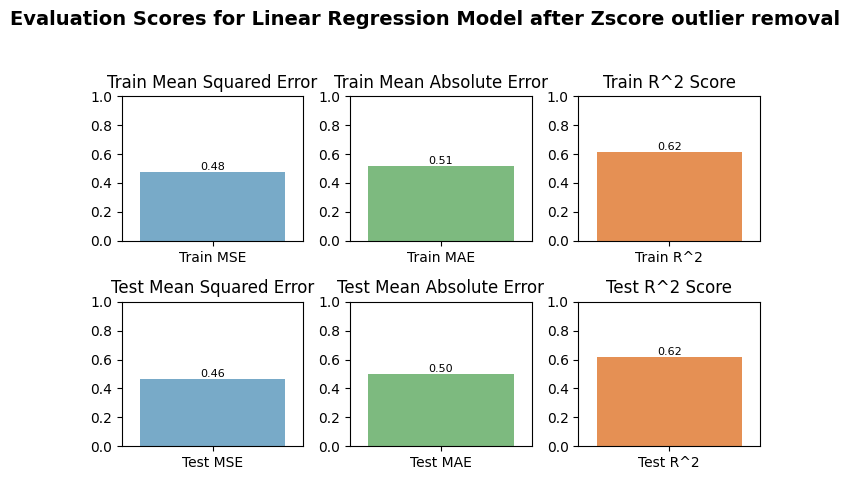

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'df' is your DataFrame
# Split the dataset into features and target variable
X = df_Z.iloc[:, :-1]  # Features (all columns except the last)
y = df_Z.iloc[:, -1]   # Target (the last column)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Evaluate the model on training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the model on testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Visualize evaluation scores
plt.figure(figsize=(7, 5))

# Plotting Mean Squared Error (MSE)
plt.subplot(2, 3, 1)
sns.barplot(x=['Train MSE'], y=[train_mse], palette='Blues')
plt.title('Train Mean Squared Error')
plt.ylim(0, max(train_mse * 1.2, 1))  # Set y-axis limit
# Annotate bars with values
for index, value in enumerate([train_mse]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.subplot(2, 3, 4)
sns.barplot(x=['Test MSE'], y=[test_mse], palette='Blues')
plt.title('Test Mean Squared Error')
plt.ylim(0, max(test_mse * 1.2, 1))  # Set y-axis limit
# Annotate bars with values
for index, value in enumerate([test_mse]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

# Plotting Mean Absolute Error (MAE)
plt.subplot(2, 3, 2)
sns.barplot(x=['Train MAE'], y=[train_mae], palette='Greens')
plt.title('Train Mean Absolute Error')
plt.ylim(0, max(train_mae * 1.2, 1))  # Set y-axis limit
# Annotate bars with values
for index, value in enumerate([train_mae]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.subplot(2, 3, 5)
sns.barplot(x=['Test MAE'], y=[test_mae], palette='Greens')
plt.title('Test Mean Absolute Error')
plt.ylim(0, max(test_mae * 1.2, 1))  # Set y-axis limit
# Annotate bars with values
for index, value in enumerate([test_mae]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

# Plotting R^2 Score
plt.subplot(2, 3, 3)
sns.barplot(x=['Train R^2'], y=[train_r2], palette='Oranges')
plt.title('Train R^2 Score')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1]
# Annotate bars with values
for index, value in enumerate([train_r2]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.subplot(2, 3, 6)
sns.barplot(x=['Test R^2'], y=[test_r2], palette='Oranges')
plt.title('Test R^2 Score')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1]
# Annotate bars with values
for index, value in enumerate([test_r2]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.suptitle('Evaluation Scores for Linear Regression Model after Zscore outlier removal', fontsize=14, fontweight='bold')  # Add overall title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlapping and leave space for suptitle
plt.show()


Bivariate Analysis using PCA

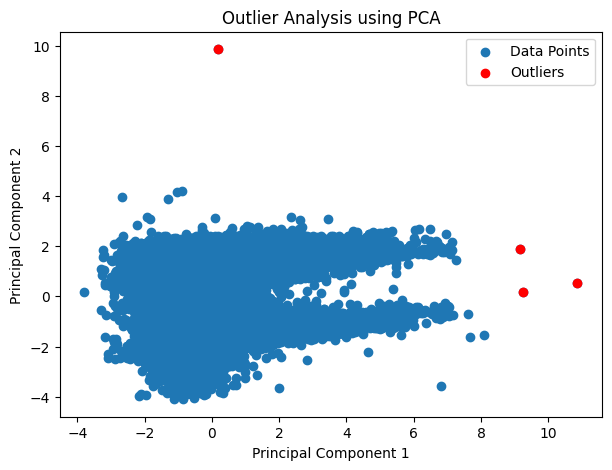

Number of outliers detected by PCA: 4
Total number of rows in the DataFrame: 37137
Number of outliers detected by PCA: 4


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import chi2

# Assuming 'df_train' is your DataFrame and it has been scaled
# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_train)

# Step 2: Determine the number of components to retain based on explained variance or a threshold (example assumes 2 components)
n_components = 2  # For example, retain the first two principal components

# Step 3: Perform PCA with the selected number of components
pca = PCA(n_components=n_components)
pca.fit(scaled_data)
transformed_data = pca.transform(scaled_data)

# Step 4: Calculate Mahalanobis Distance
center = np.mean(transformed_data, axis=0)
covariance = np.cov(transformed_data.T)
inv_covariance = np.linalg.inv(covariance)
mahalanobis_distances = []
for point in transformed_data:
    diff = point - center
    mahalanobis_distance = np.sqrt(np.dot(np.dot(diff.T, inv_covariance), diff))
    mahalanobis_distances.append(mahalanobis_distance)

# Step 5: Identify Outliers
threshold = chi2.ppf(0.95, n_components)  # Choose the significance level (e.g., 0.95 for 95% confidence)
outliers_indices = np.where(np.array(mahalanobis_distances) > threshold)[0]

# Step 6: Visualize Outliers
plt.figure(figsize=(7, 5))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], label='Data Points')
plt.scatter(transformed_data[outliers_indices, 0], transformed_data[outliers_indices, 1], color='red', label='Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Outlier Analysis using PCA')
plt.legend()
plt.show()

# Assuming 'outliers_indices' contains the indices of outlier rows detected by PCA
num_outliers = len(outliers_indices)  # Number of outlier rows detected by PCA

print(f"Number of outliers detected by PCA: {num_outliers}")

# Assuming 'outliers_indices' contains the indices of outlier rows detected by PCA
total_rows = len(df_train)  # Total number of rows in the DataFrame
num_outliers = len(outliers_indices)  # Number of outlier rows detected by PCA

print(f"Total number of rows in the DataFrame: {total_rows}")
print(f"Number of outliers detected by PCA: {num_outliers}")


Performance Evaluation after removal of PCA outliers

In [ ]:
# Create a new DataFrame without outliers
df_PCA = df_train.drop(index=outliers_indices)

# Optional: Reset the index of the new DataFrame if needed
df_PCA.reset_index(drop=True, inplace=True)

# Print the shape of the new DataFrame to verify the removal of outliers
print("Shape of DataFrame without outliers:", df_PCA.shape)


Shape of DataFrame without outliers: (37133, 9)


<ipython-input-51-7def8d6ec984>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train MSE'], y=[train_mse], palette='Blues')
<ipython-input-51-7def8d6ec984>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Test MSE'], y=[test_mse], palette='Blues')
<ipython-input-51-7def8d6ec984>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train MAE'], y=[train_mae], palette='Greens')
<ipython-input-51-7def8d6ec984>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x`

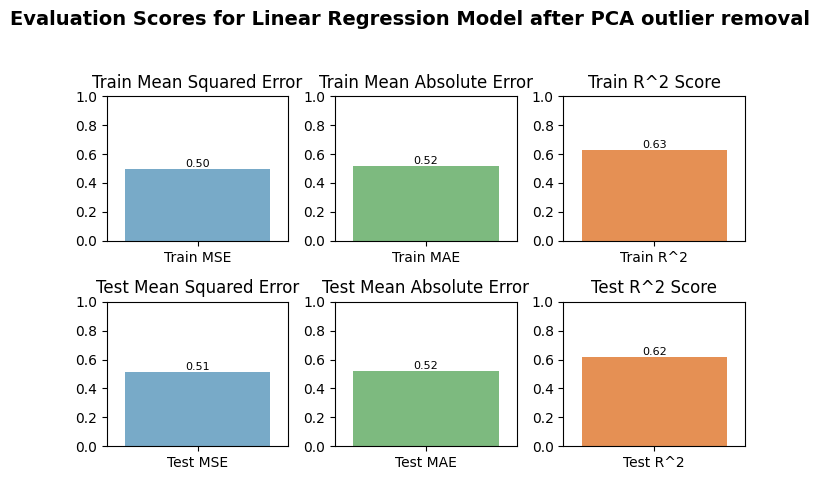

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'df' is your DataFrame
# Split the dataset into features and target variable
X = df_PCA.iloc[:, :-1]  # Features (all columns except the last)
y = df_PCA.iloc[:, -1]   # Target (the last column)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Evaluate the model on training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the model on testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Visualize evaluation scores
plt.figure(figsize=(7, 5))

# Plotting Mean Squared Error (MSE)
plt.subplot(2, 3, 1)
sns.barplot(x=['Train MSE'], y=[train_mse], palette='Blues')
plt.title('Train Mean Squared Error')
plt.ylim(0, max(train_mse * 1.2, 1))  # Set y-axis limit
# Annotate bars with values
for index, value in enumerate([train_mse]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.subplot(2, 3, 4)
sns.barplot(x=['Test MSE'], y=[test_mse], palette='Blues')
plt.title('Test Mean Squared Error')
plt.ylim(0, max(test_mse * 1.2, 1))  # Set y-axis limit
# Annotate bars with values
for index, value in enumerate([test_mse]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

# Plotting Mean Absolute Error (MAE)
plt.subplot(2, 3, 2)
sns.barplot(x=['Train MAE'], y=[train_mae], palette='Greens')
plt.title('Train Mean Absolute Error')
plt.ylim(0, max(train_mae * 1.2, 1))  # Set y-axis limit
# Annotate bars with values
for index, value in enumerate([train_mae]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.subplot(2, 3, 5)
sns.barplot(x=['Test MAE'], y=[test_mae], palette='Greens')
plt.title('Test Mean Absolute Error')
plt.ylim(0, max(test_mae * 1.2, 1))  # Set y-axis limit
# Annotate bars with values
for index, value in enumerate([test_mae]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

# Plotting R^2 Score
plt.subplot(2, 3, 3)
sns.barplot(x=['Train R^2'], y=[train_r2], palette='Oranges')
plt.title('Train R^2 Score')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1]
# Annotate bars with values
for index, value in enumerate([train_r2]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.subplot(2, 3, 6)
sns.barplot(x=['Test R^2'], y=[test_r2], palette='Oranges')
plt.title('Test R^2 Score')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1]
# Annotate bars with values
for index, value in enumerate([test_r2]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.suptitle('Evaluation Scores for Linear Regression Model after PCA outlier removal', fontsize=14, fontweight='bold')  # Add overall title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlapping and leave space for suptitle
plt.show()


Number of outliers: 13
Percentage of outliers detected: 0.03500552010124674 %


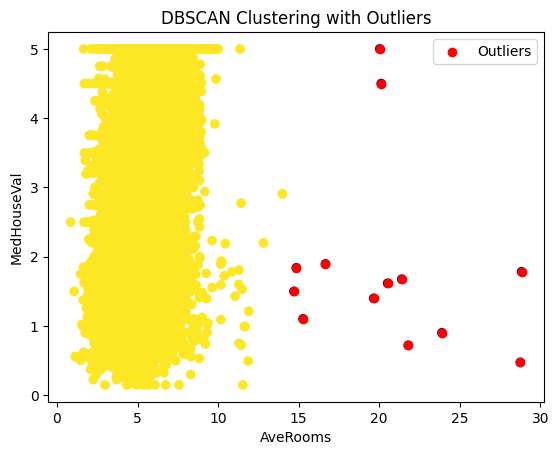

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Assuming 'df_train' contains your DataFrame with numerical data

# Extract the features for clustering
X_db = df_train[['AveRooms', 'MedHouseVal']].values

# Set DBSCAN parameters
eps = 2  # Example epsilon value
min_samples = 10  # Example minimum number of points

# Perform DBSCAN clustering
db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_db)
labels = db.labels_

# Count the number of data points in each cluster
cluster_counts = pd.Series(labels).value_counts()

# Identify outliers (points with cluster label -1)
outliers_mask = labels == -1
num_outliers = sum(outliers_mask)

print("Number of outliers:", num_outliers)

# Calculate the percentage of outliers detected
percentage_outliers = (num_outliers / len(df_train)) * 100

print("Percentage of outliers detected:", percentage_outliers, "%")


# Visualize clustering results
plt.scatter(X_db[:, 0], X_db[:, 1], c=labels, cmap='viridis')
plt.scatter(X_db[outliers_mask, 0], X_db[outliers_mask, 1], color='red', label='Outliers')
plt.title('DBSCAN Clustering with Outliers')
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.legend()
plt.show()


Performance Evaluation after removal of DBSCAN outliers

In [ ]:
# Create a new DataFrame without outliers
df_db = df_train[~outliers_mask]

# Display the shape of the new DataFrame
print("Shape of DataFrame without outliers:", df_db.shape)


Shape of DataFrame without outliers: (37124, 9)


<ipython-input-46-b360b681746e>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train MSE'], y=[train_mse], palette='Blues')
<ipython-input-46-b360b681746e>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Test MSE'], y=[test_mse], palette='Blues')
<ipython-input-46-b360b681746e>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train MAE'], y=[train_mae], palette='Greens')
<ipython-input-46-b360b681746e>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x`

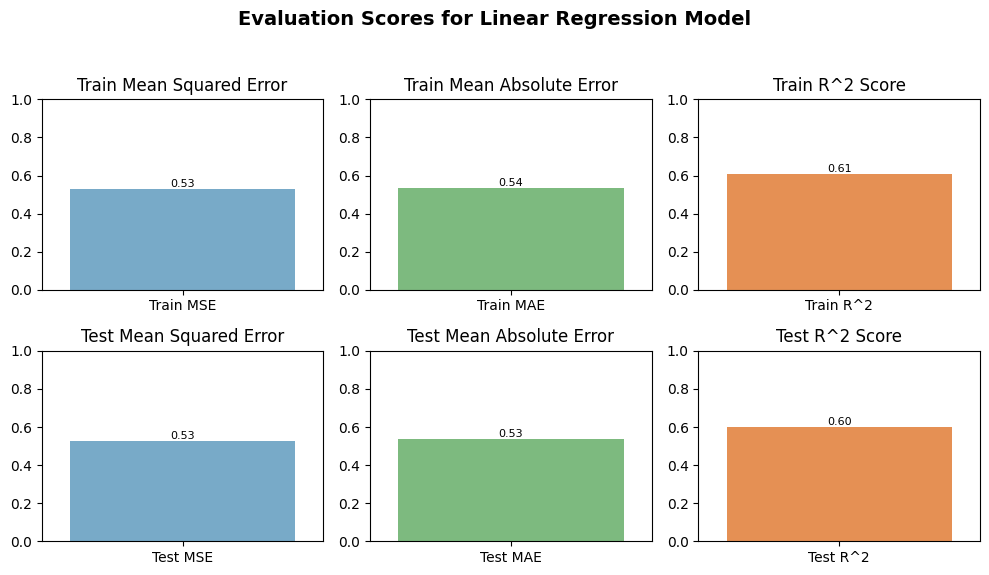

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'df' is your DataFrame
# Split the dataset into features and target variable
X = df_db.iloc[:, :-1]  # Features (all columns except the last)
y = df_db.iloc[:, -1]   # Target (the last column)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Evaluate the model on training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the model on testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Visualize evaluation scores
plt.figure(figsize=(10, 6))

# Plotting Mean Squared Error (MSE)
plt.subplot(2, 3, 1)
sns.barplot(x=['Train MSE'], y=[train_mse], palette='Blues')
plt.title('Train Mean Squared Error')
plt.ylim(0, max(train_mse * 1.2, 1))  # Set y-axis limit
# Annotate bars with values
for index, value in enumerate([train_mse]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.subplot(2, 3, 4)
sns.barplot(x=['Test MSE'], y=[test_mse], palette='Blues')
plt.title('Test Mean Squared Error')
plt.ylim(0, max(test_mse * 1.2, 1))  # Set y-axis limit
# Annotate bars with values
for index, value in enumerate([test_mse]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

# Plotting Mean Absolute Error (MAE)
plt.subplot(2, 3, 2)
sns.barplot(x=['Train MAE'], y=[train_mae], palette='Greens')
plt.title('Train Mean Absolute Error')
plt.ylim(0, max(train_mae * 1.2, 1))  # Set y-axis limit
# Annotate bars with values
for index, value in enumerate([train_mae]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.subplot(2, 3, 5)
sns.barplot(x=['Test MAE'], y=[test_mae], palette='Greens')
plt.title('Test Mean Absolute Error')
plt.ylim(0, max(test_mae * 1.2, 1))  # Set y-axis limit
# Annotate bars with values
for index, value in enumerate([test_mae]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

# Plotting R^2 Score
plt.subplot(2, 3, 3)
sns.barplot(x=['Train R^2'], y=[train_r2], palette='Oranges')
plt.title('Train R^2 Score')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1]
# Annotate bars with values
for index, value in enumerate([train_r2]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.subplot(2, 3, 6)
sns.barplot(x=['Test R^2'], y=[test_r2], palette='Oranges')
plt.title('Test R^2 Score')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1]
# Annotate bars with values
for index, value in enumerate([test_r2]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

plt.suptitle('Evaluation Scores for Linear Regression Model', fontsize=14, fontweight='bold')  # Add overall title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlapping and leave space for suptitle
plt.show()
